<a href="https://colab.research.google.com/github/jenniferamhajduk/AIML_Playground/blob/main/MultiClass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [57]:
NUM_CLASSES = 4
NUM_FEATURES = 2
SAMPLES = 1000
STD = 1.8
TEST_SPLIT=0.2
input_features = 2
output_features = 4
hidden_units = 8

In [58]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [59]:
X_blob, y_blob = make_blobs(n_samples=SAMPLES, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=STD)

In [60]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=TEST_SPLIT)

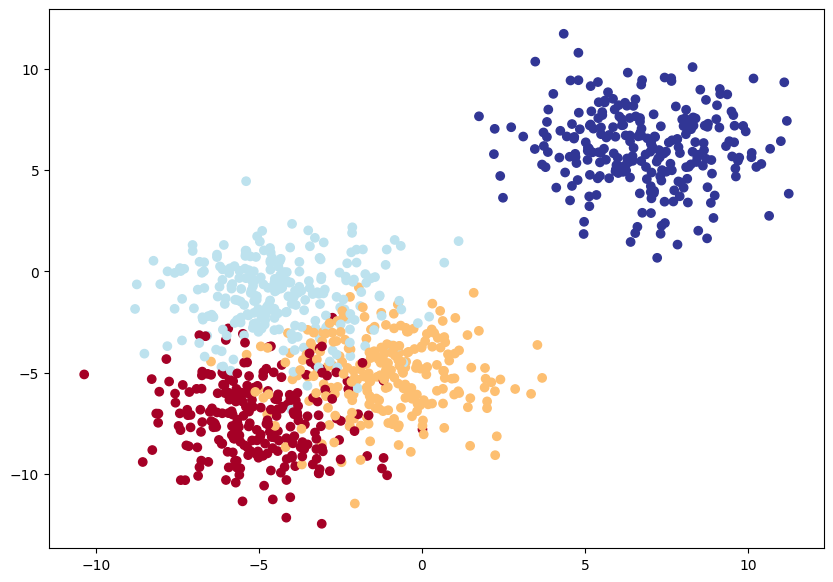

In [61]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [62]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [63]:
blob_model = BlobModel(input_features=input_features, output_features=output_features, hidden_units=hidden_units).to(device)

In [64]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=blob_model.parameters(), lr=0.01)

In [65]:
blob_model(X_blob_test)

tensor([[ 1.1985e-01,  8.1762e-02, -1.0120e-01,  2.9862e-01],
        [ 2.1220e-01,  1.9740e-01, -1.4838e-01,  2.2759e-01],
        [ 1.2015e-01,  4.4285e-01, -5.7774e-01, -1.2912e+00],
        [ 2.0312e-01,  2.6282e-01, -1.7883e-01,  2.2455e-01],
        [ 2.8787e-01,  3.1416e-01, -2.7593e-01,  1.6785e-01],
        [ 2.9469e-02,  4.3992e-01, -1.7627e-01, -8.4293e-01],
        [ 1.4594e-01,  1.2030e-01, -9.6452e-02,  2.8434e-01],
        [ 1.3030e-01,  3.0355e-01, -4.8424e-01, -7.9147e-01],
        [ 1.6212e-01,  1.4120e-01, -1.0415e-01,  2.6644e-01],
        [ 1.6852e-01,  1.5105e-01, -1.0898e-01,  2.6025e-01],
        [ 2.1448e-01,  2.5230e-01, -1.8075e-01,  2.1411e-01],
        [ 1.6679e-01,  1.4759e-01, -1.0677e-01,  2.6148e-01],
        [ 1.1928e-01,  7.8735e-02, -1.0425e-01,  2.9423e-01],
        [ 1.1959e-01,  8.0492e-02, -1.0233e-01,  2.9690e-01],
        [ 1.2009e-01,  7.2937e-02, -1.2433e-01,  2.7451e-01],
        [ 1.5953e-01,  1.3786e-01, -1.0292e-01,  2.6931e-01],
        